In [3]:
# USING LINEAR REGRESSION 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Took help from chat-gpt
# List of encodings to try
encodings = ['utf-8', 'latin1', 'iso-8859-1']

# Try reading the CSV file using different encodings
for encoding in encodings:
    try:
        df = pd.read_csv('ToyotaCorolla.csv', encoding=encoding)
        # If successful, break the loop
        break
    except UnicodeDecodeError:
        print(f"Attempted encoding '{encoding}' failed.")

# If the loop completes without success
else:
    print("Unable to read the file using any of the specified encodings.")

# Now, 'df' should contain the DataFrame if the CSV was successfully read


Attempted encoding 'utf-8' failed.


In [5]:
df

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

# EDA

In [6]:
data = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
data.describe()

Price    Age_08_04             KM           HP           cc  \
count   1436.000000  1436.000000    1436.000000  1436.000000   1436.00000   
mean   10730.824513    55.947075   68533.259749   101.502089   1576.85585   
std     3626.964585    18.599988   37506.448872    14.981080    424.38677   
min     4350.000000     1.000000       1.000000    69.000000   1300.00000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.00000   
50%     9900.000000    61.000000   63389.500000   110.000000   1600.00000   
75%    11950.000000    70.000000   87020.750000   110.000000   1600.00000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.00000   

             Doors        Gears  Quarterly_Tax      Weight  
count  1436.000000  1436.000000    1436.000000  1436.00000  
mean      4.033426     5.026462      87.122563  1072.45961  
std       0.952677     0.188510      41.128611    52.64112  
min       2.000000     3.000000      19.000000  1000.00000  
25%       3.000000     5.000000      69.000000  1040.00000  
50%       4.000000     5.000000      85.000000  1070.00000  
75%       5.000000     5.000000      85.000000  1085.00000  
max       5.000000     6.000000     283.000000  1615.00000

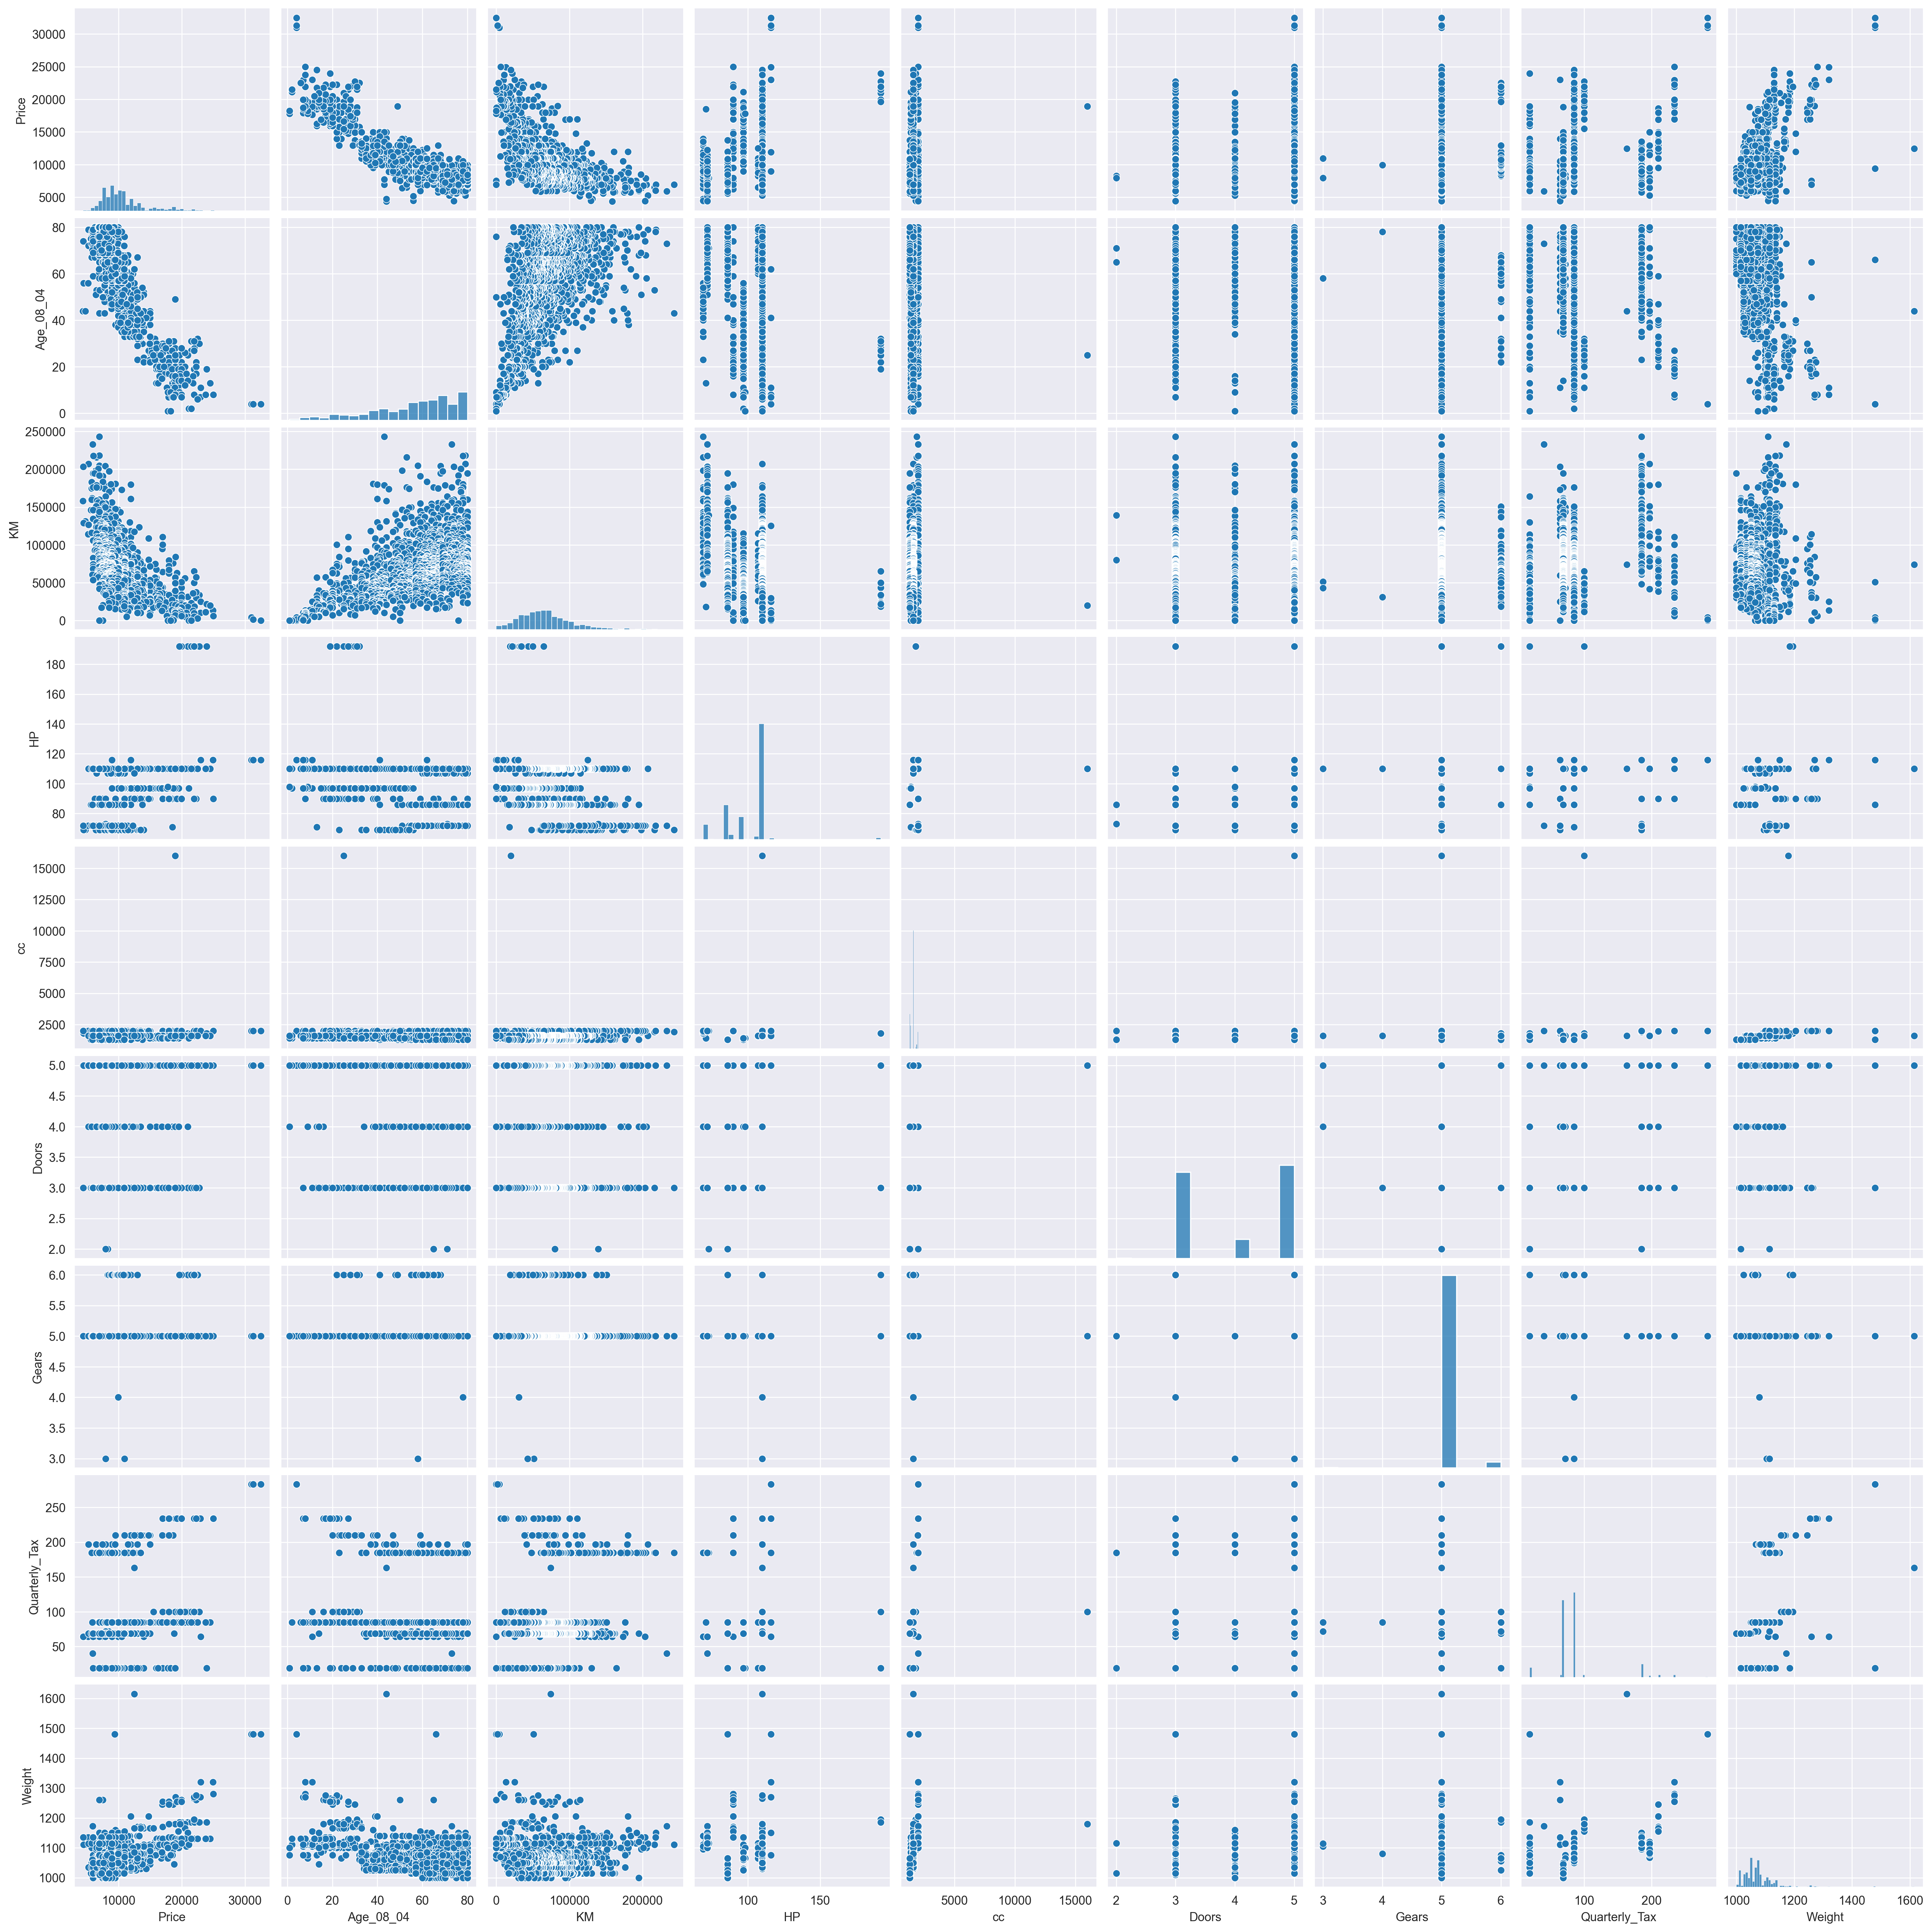

In [7]:
sns.pairplot(data)

<Axes: >

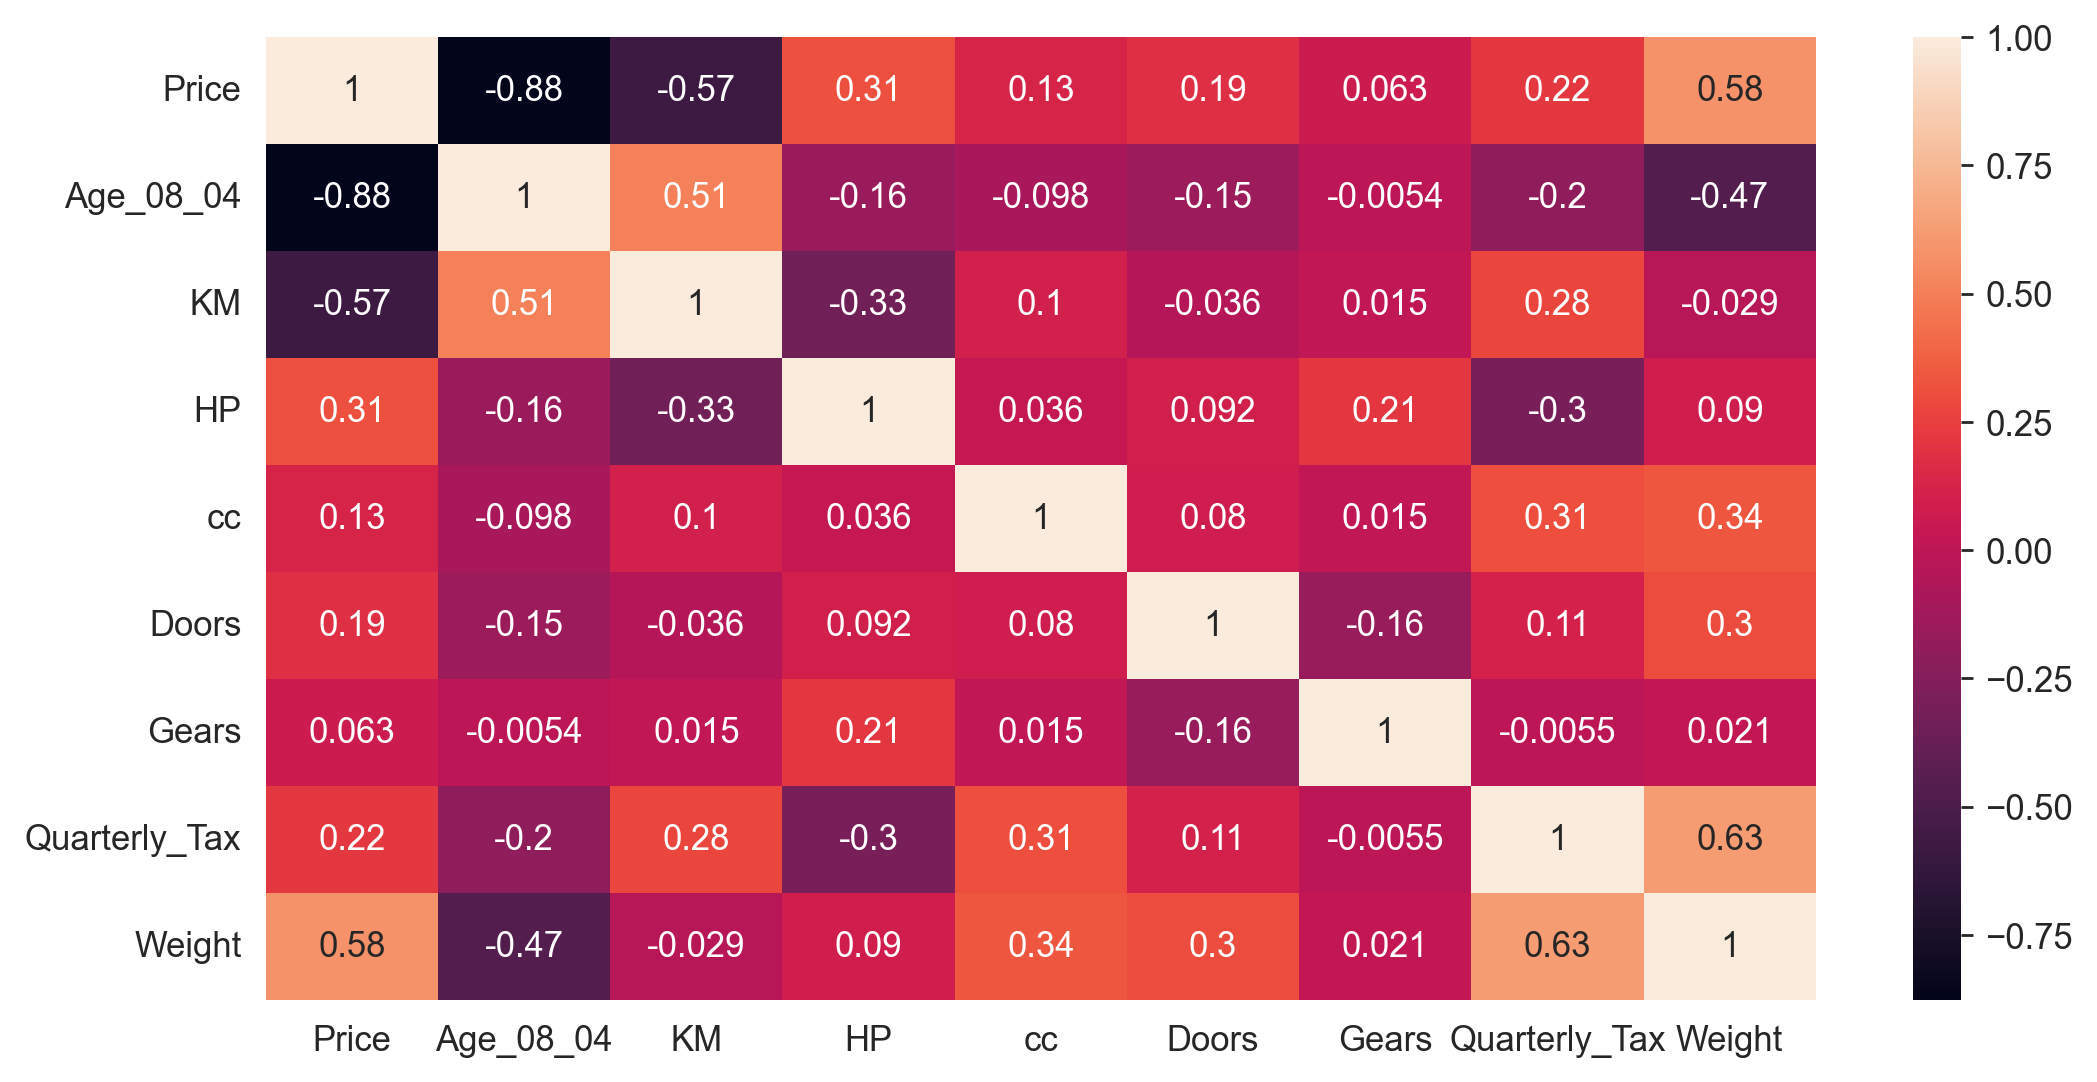

In [8]:
sns.heatmap(data.corr(),annot=True)

# Model Building

In [7]:
import statsmodels.formula.api as smf

In [8]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=data).fit()
model

In [9]:
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [10]:
# Calculate VIF

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [12]:
data.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [13]:
data1 = data.drop(columns=['Price'])
data1

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0            23  46986   90  2000      3      5            210    1165
1            23  72937   90  2000      3      5            210    1165
2            24  41711   90  2000      3      5            210    1165
3            26  48000   90  2000      3      5            210    1165
4            30  38500   90  2000      3      5            210    1170
...         ...    ...  ...   ...    ...    ...            ...     ...
1431         69  20544   86  1300      3      5             69    1025
1432         72  19000   86  1300      3      5             69    1015
1433         71  17016   86  1300      3      5             69    1015
1434         70  16916   86  1300      3      5             69    1015
1435         76      1  110  1600      5      5             19    1114

[1436 rows x 8 columns]

In [14]:
data1.values

array([[   23, 46986,    90, ...,     5,   210,  1165],
       [   23, 72937,    90, ...,     5,   210,  1165],
       [   24, 41711,    90, ...,     5,   210,  1165],
       ...,
       [   71, 17016,    86, ...,     5,    69,  1015],
       [   70, 16916,    86, ...,     5,    69,  1015],
       [   76,     1,   110, ...,     5,    19,  1114]], dtype=int64)

In [15]:
vif =  pd.DataFrame()
vif

Empty DataFrame
Columns: []
Index: []

In [16]:
vif['Features'] = data1.columns
vif

Features
0      Age_08_04
1             KM
2             HP
3             cc
4          Doors
5          Gears
6  Quarterly_Tax
7         Weight

In [17]:
range(len(data1.columns))

range(0, 8)

In [18]:
vif['VIF'] = [variance_inflation_factor(data1.values,i) for i in range(len(data1.columns))]
vif

Features         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076

In [19]:
#Subset selection

In [20]:
gr = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',data=data).fit()
gr.rsquared,gr.aic

(0.8396879765183245, 25000.74856959188)

In [21]:
wt = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax',data=data).fit()
wt.rsquared,wt.aic

(0.8628943128267853, 24776.201256363624)

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Sun, 31 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:24:45   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Model Validation Techique

In [24]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax',data=data).fit()
model1.rsquared

0.8628943128267853

In [25]:
#Statsmodel
import statsmodels.api as sm

In [26]:
data.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [27]:
model1.resid

0      -3348.813115
1      -2565.942038
2      -2885.335830
3      -1512.613619
4      -2505.439160
           ...     
1431   -1282.752185
1432    2565.774124
1433      58.242423
1434   -1315.603712
1435   -3430.503288
Length: 1436, dtype: float64

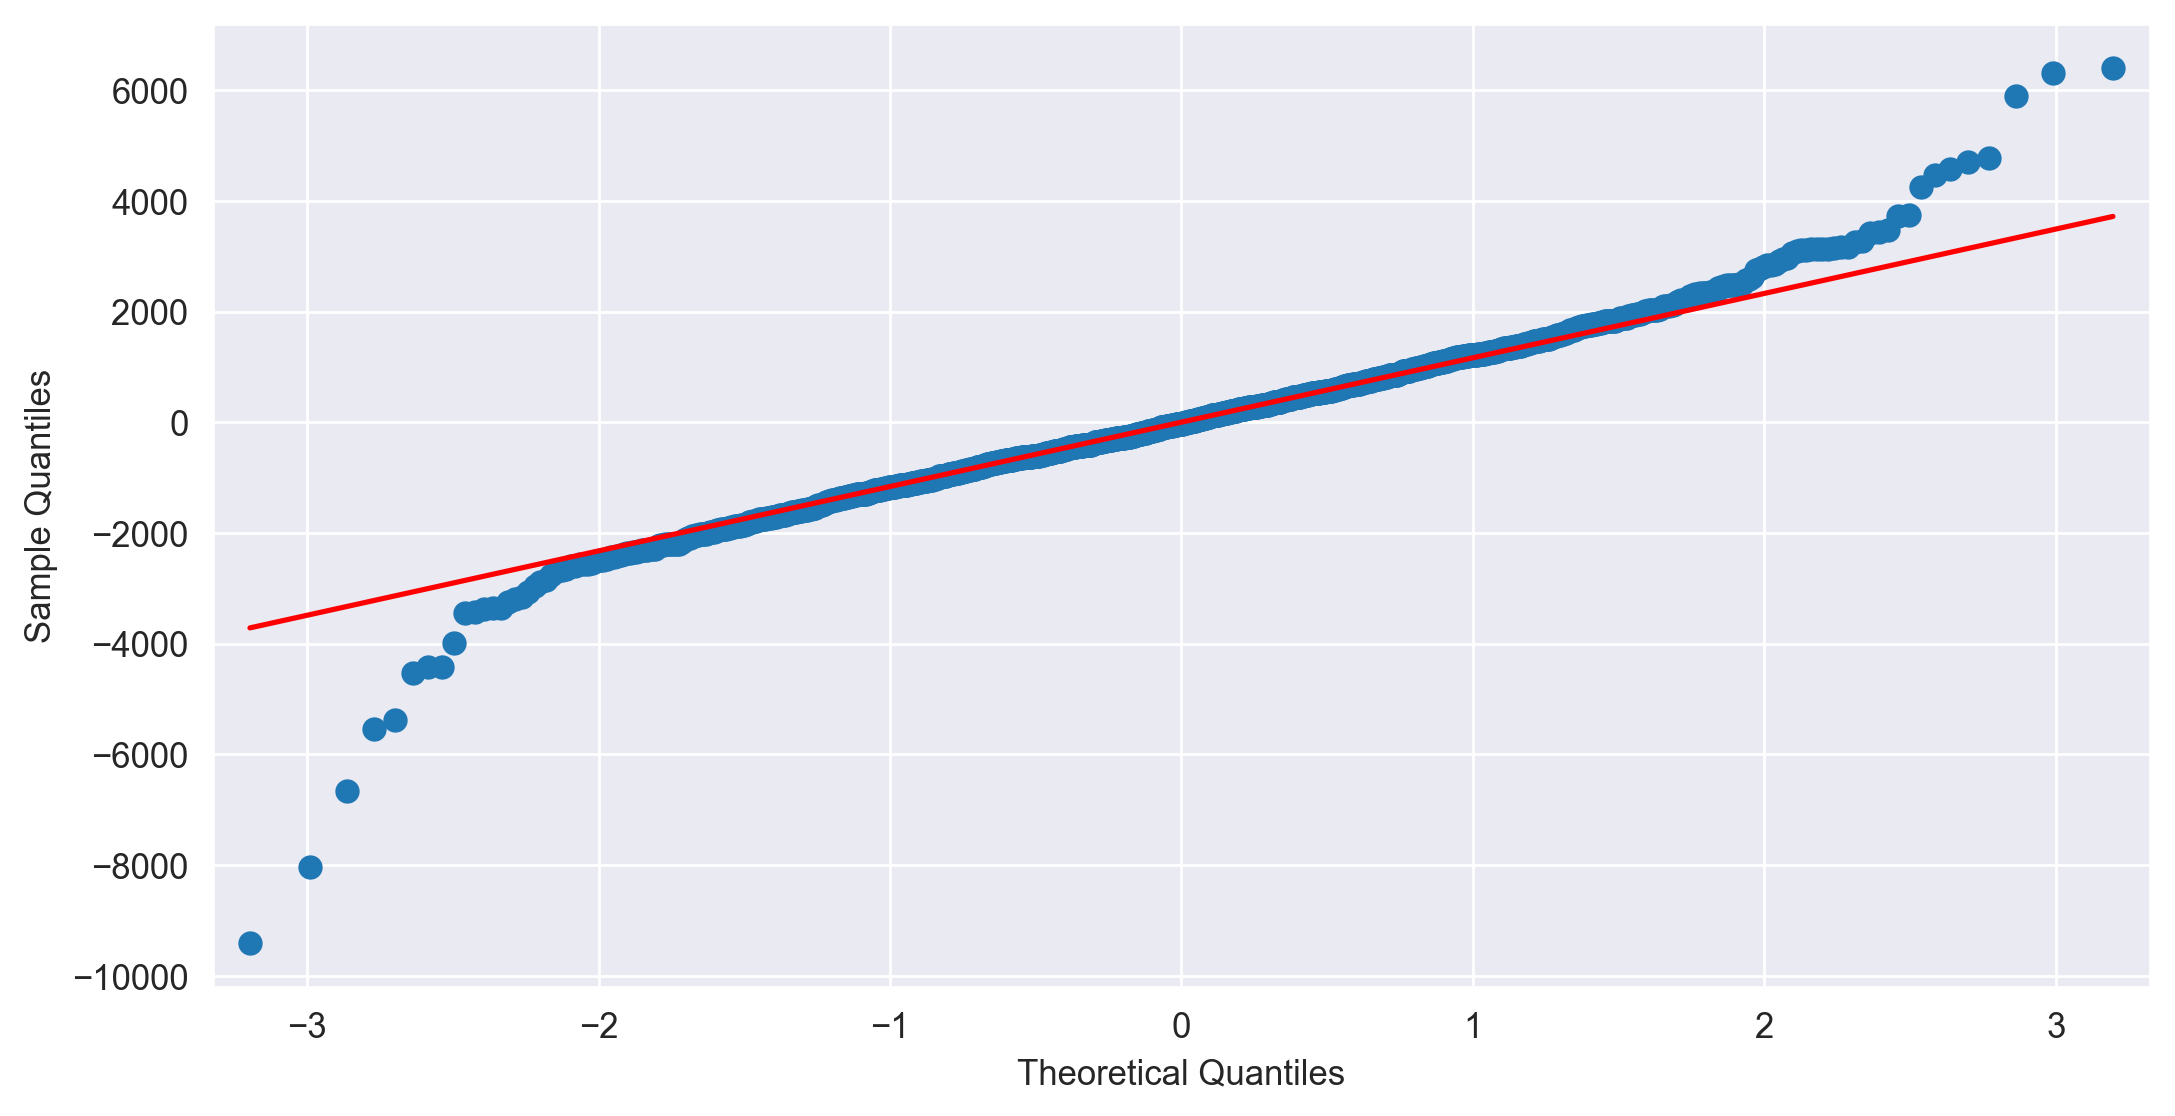

In [28]:
#Q-Q plot
sm.qqplot(model1.resid, line = 'q');

In [29]:
#get index for higher residuals
np.argmax(model1.resid), np.max(model1.resid)

(523, 6402.687125950541)

In [30]:
#Residual plot of Homoscedasticity

In [31]:
model1.fittedvalues, model1.resid

(0       16848.813115
 1       16315.942038
 2       16835.335830
 3       16462.613619
 4       16255.439160
             ...     
 1431     8782.752185
 1432     8279.225876
 1433     8441.757577
 1434     8565.603712
 1435    10380.503288
 Length: 1436, dtype: float64,
 0      -3348.813115
 1      -2565.942038
 2      -2885.335830
 3      -1512.613619
 4      -2505.439160
            ...     
 1431   -1282.752185
 1432    2565.774124
 1433      58.242423
 1434   -1315.603712
 1435   -3430.503288
 Length: 1436, dtype: float64)

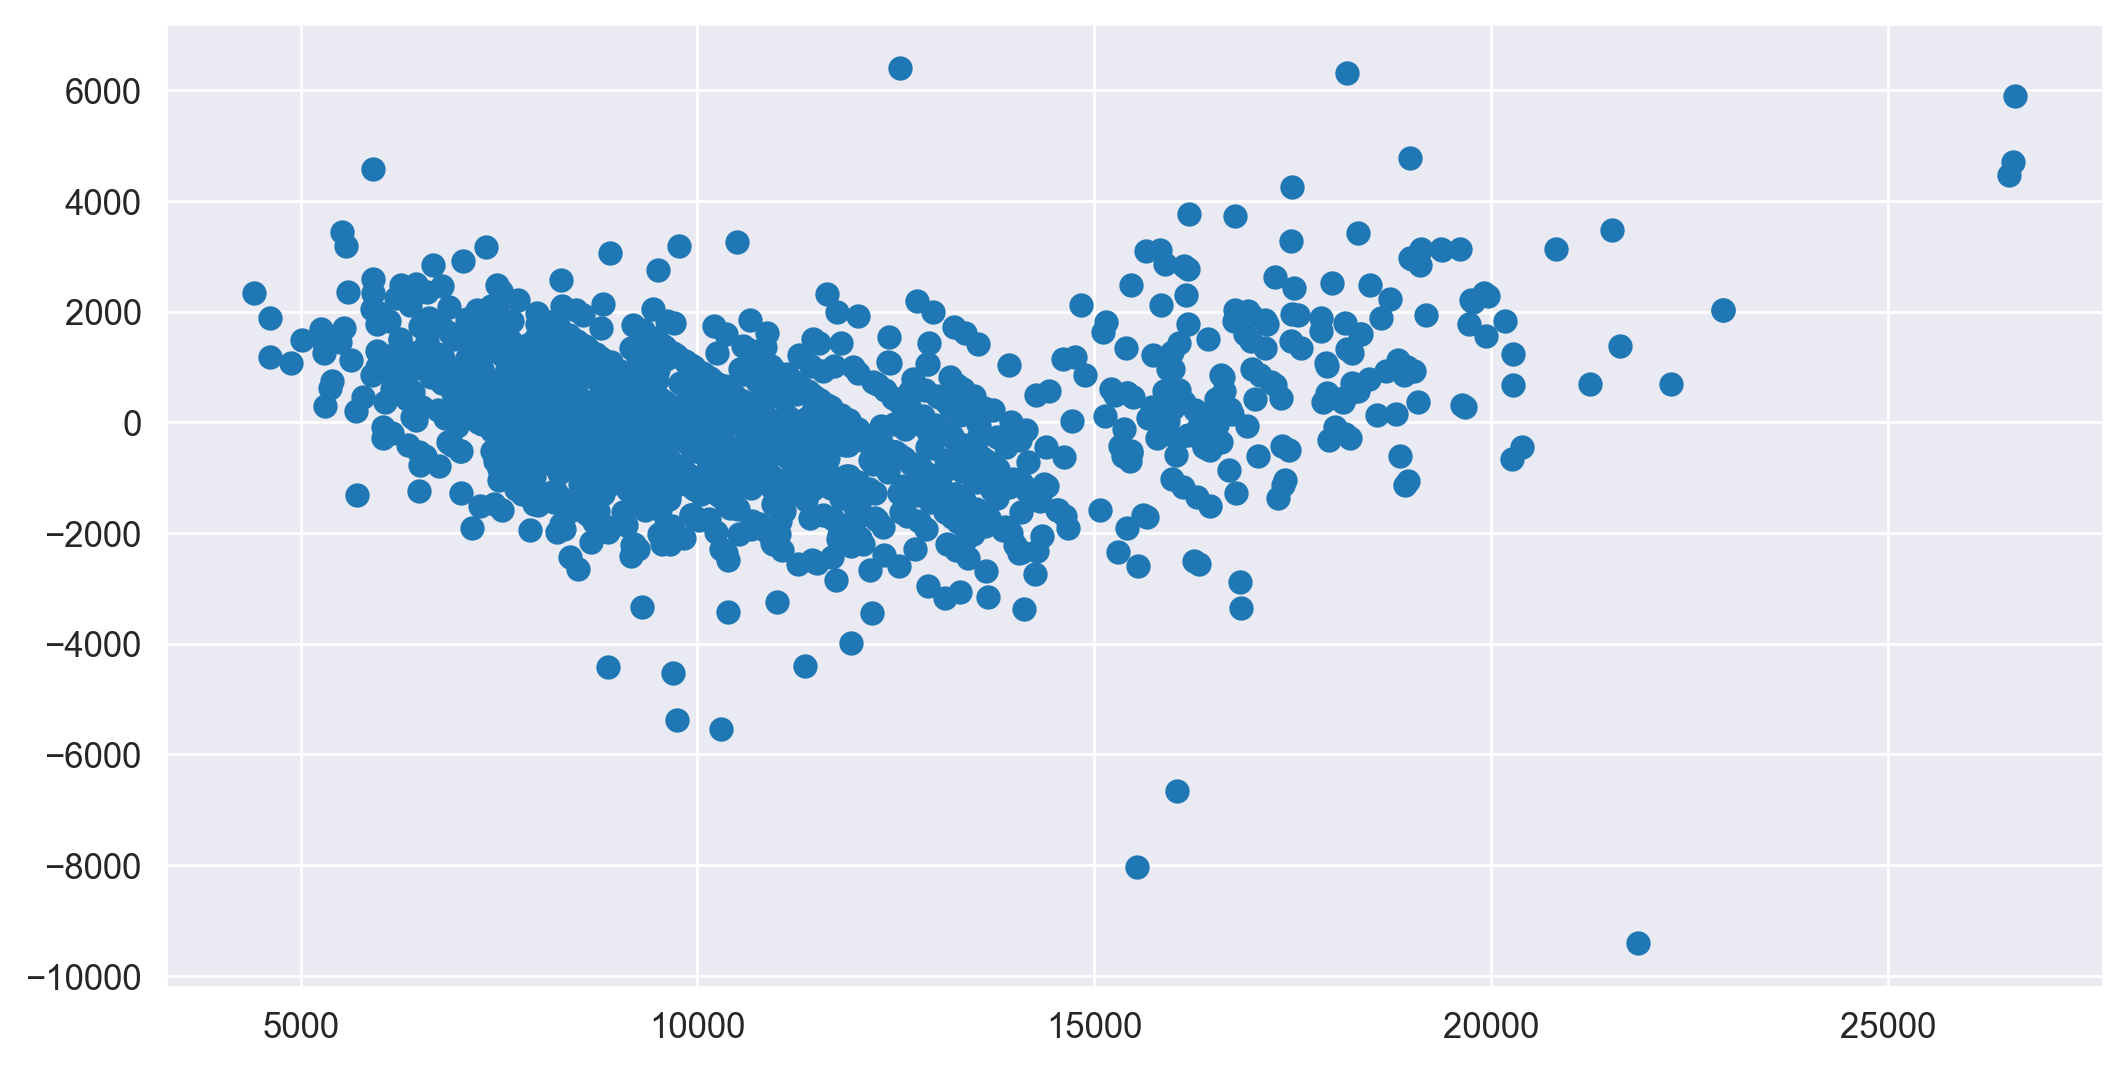

In [32]:
plt.scatter(model1.fittedvalues, model1.resid)

In [33]:
#Residual VS Regressor

eval_env: 1


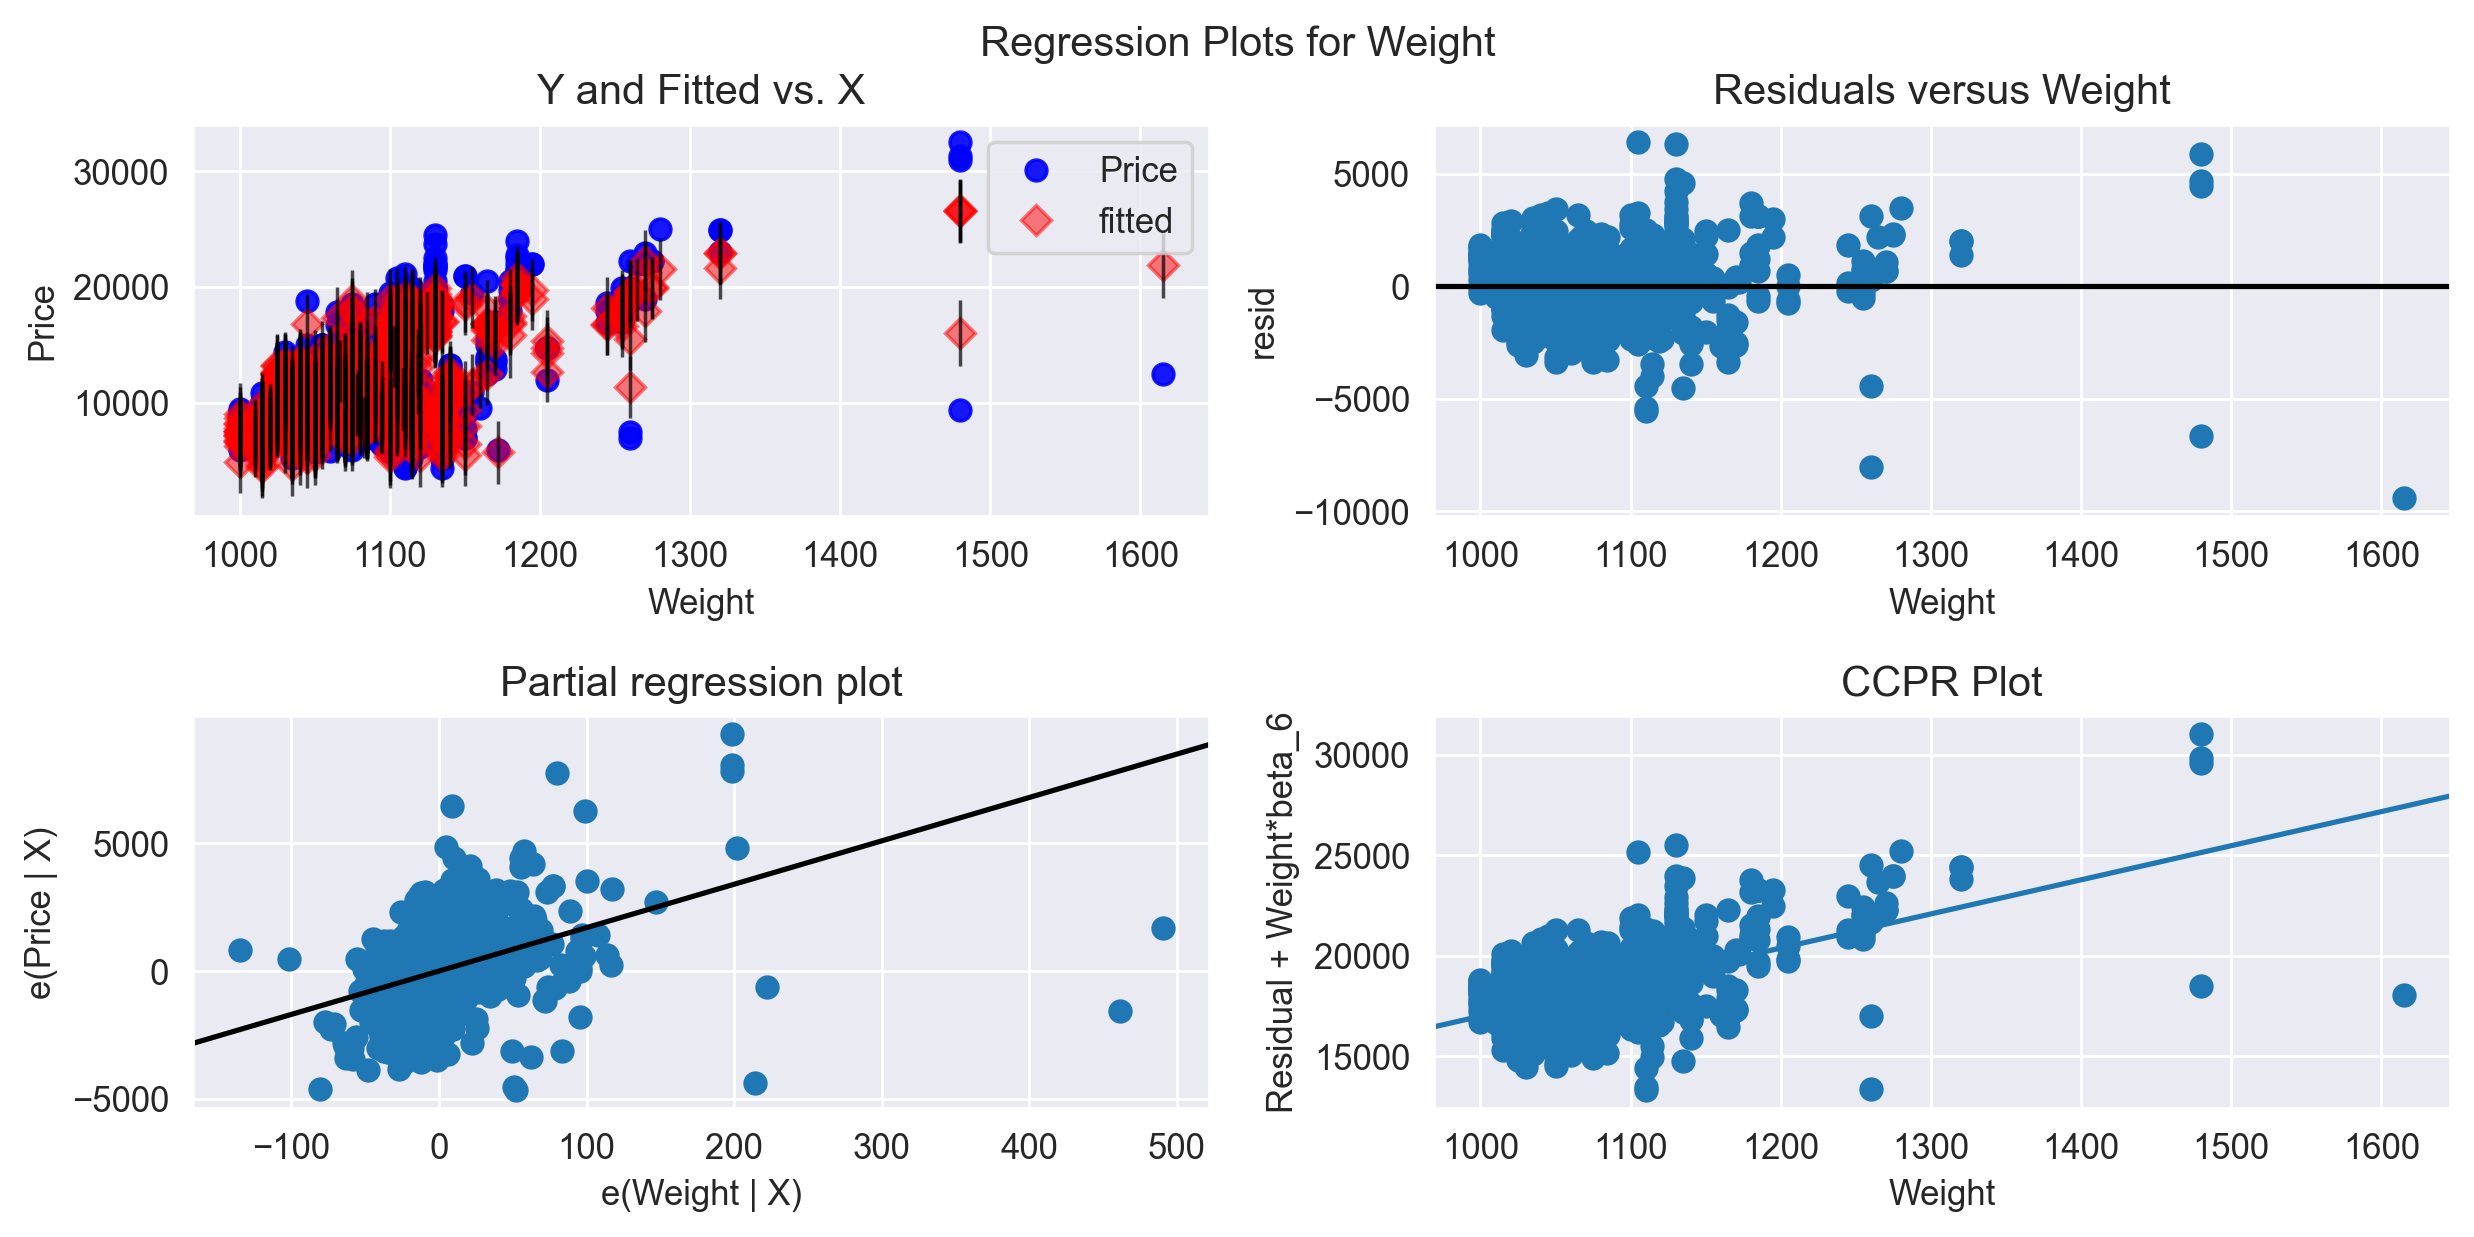

In [34]:
#rd
sm.graphics.plot_regress_exog(model1,'Weight');

In [35]:
#MODEL DELETION TECHNIQUES
#Cook's Distance
#Detecting influencers and outliers

In [36]:
model1

In [37]:
#Find the influence data
inf = model1.get_influence()

#Calculate the cooks distance
c , p = inf.cooks_distance

In [38]:
c

array([8.20901150e-03, 4.53874553e-03, 6.21874851e-03, ...,
       1.53245623e-06, 7.64981483e-04, 1.19725680e-02])

<StemContainer object of 3 artists>

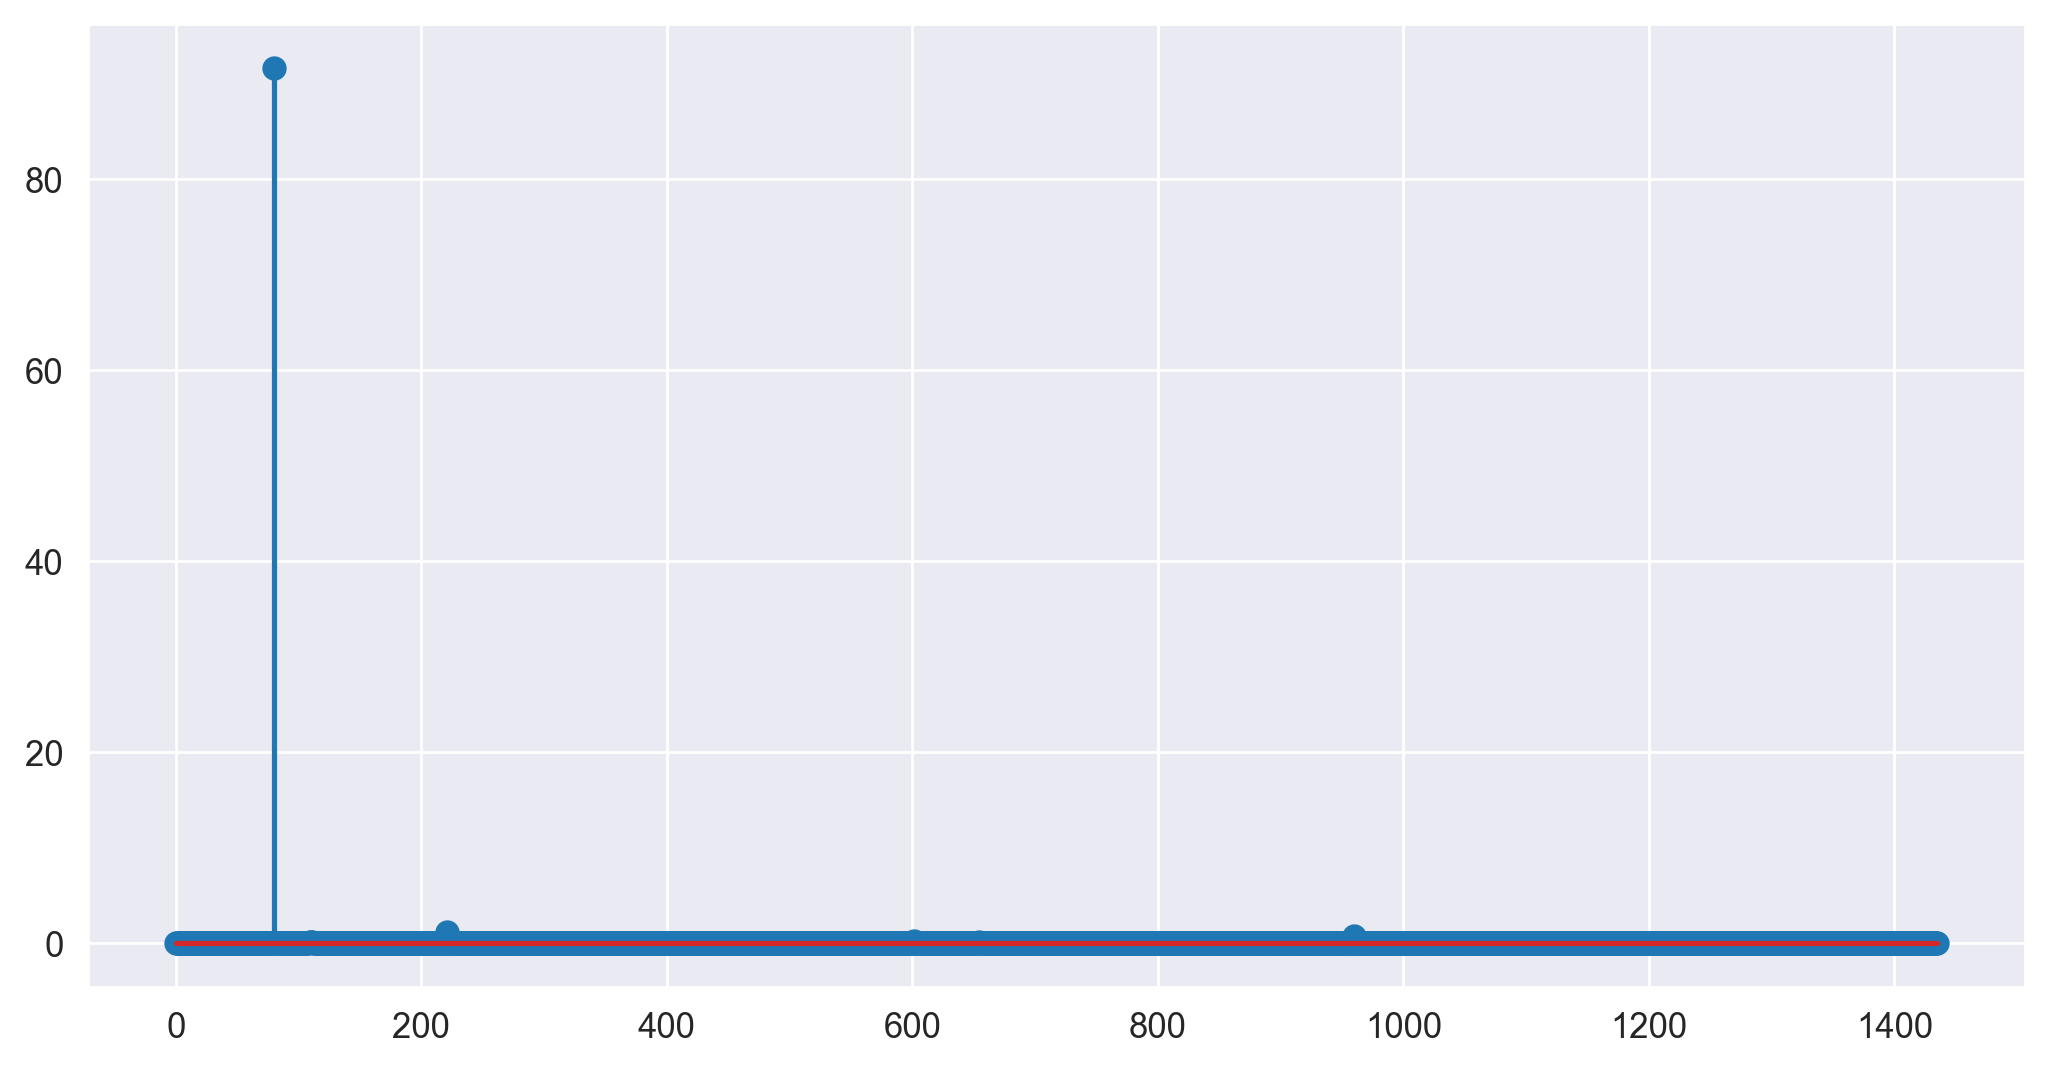

In [39]:
# Cook's distance plot
plt.stem(c)

In [40]:
np.argmax(c), np.max(c) 

(80, 91.60492711482752)

In [41]:
data.iloc[[80]]

Price  Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight
80  18950         25  20019  110  16000      5      5            100    1180

# High Influence Points 

In [42]:
#Influence Plot
from statsmodels.graphics.regressionplots import influence_plot

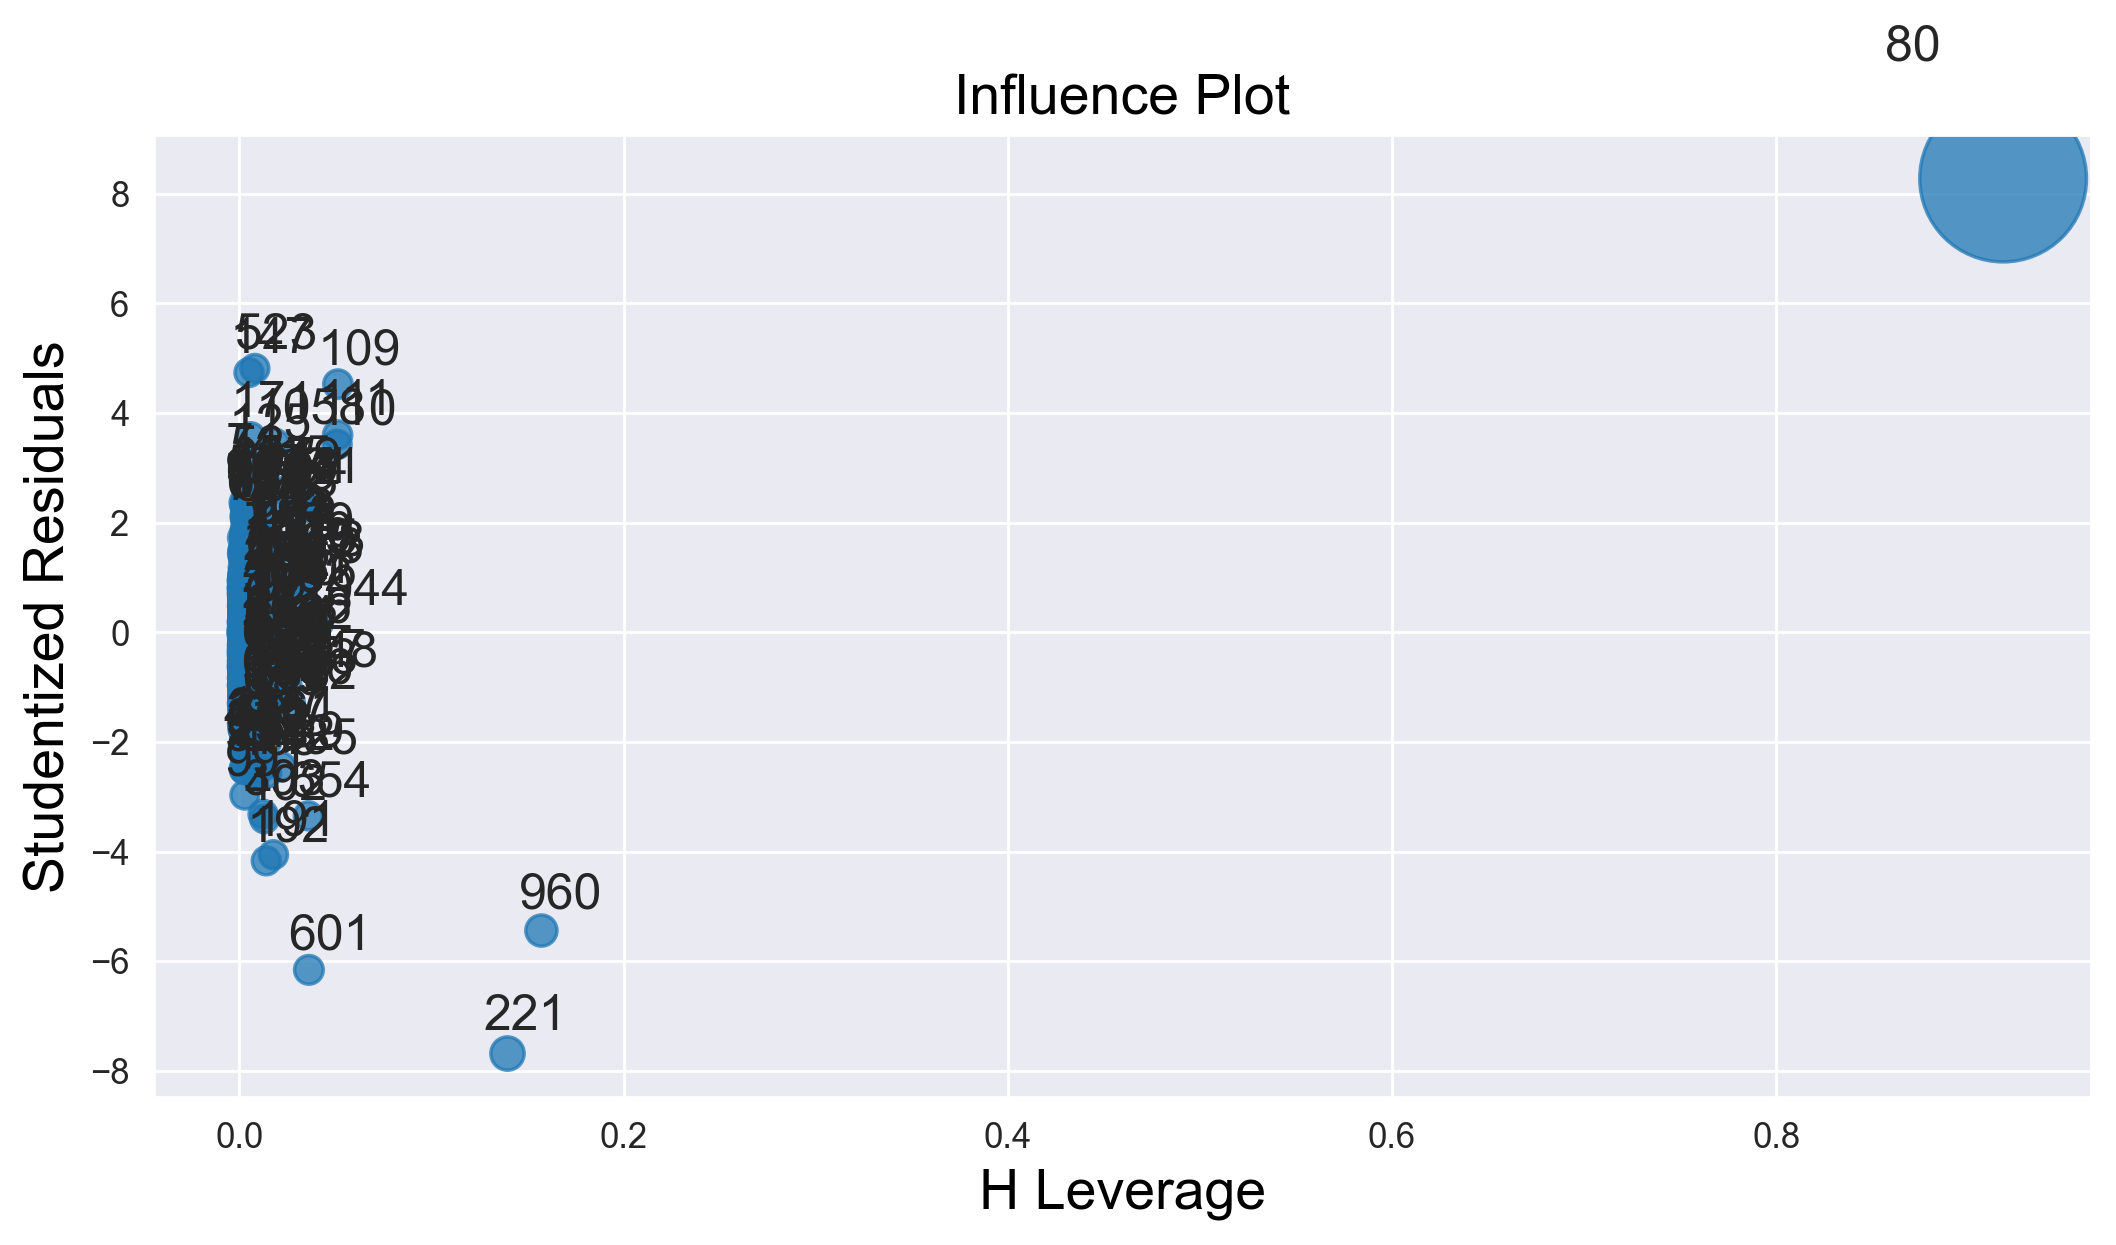

In [43]:
influence_plot(model1);

# Improving Model

In [44]:
data.drop(index=80,inplace=True)

In [45]:
data.head(82)

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0   13500         23  46986   90  2000      3      5            210    1165
1   13750         23  72937   90  2000      3      5            210    1165
2   13950         24  41711   90  2000      3      5            210    1165
3   14950         26  48000   90  2000      3      5            210    1165
4   13750         30  38500   90  2000      3      5            210    1170
..    ...        ...    ...  ...   ...    ...    ...            ...     ...
77  18450         27  23489  110  1600      5      5             85    1115
78  16895         29  22575  110  1600      5      5             85    1115
79  14900         30  22000   97  1400      5      5             85    1110
81  17250         29  20000  110  1600      5      5             85    1115
82  15450         25  17003   97  1400      5      5             85    1110

[82 rows x 9 columns]

In [46]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax',data=data).fit()
model2.rsquared

0.8687030416895446

In [47]:
#Find the influence data
model2_inf = model2.get_influence()

#Calculate the cooks distance
c1 , p = model2_inf.cooks_distance

In [48]:
c1

array([7.66974503e-03, 4.15239971e-03, 5.60013609e-03, ...,
       3.31236308e-06, 1.00545721e-03, 1.06566799e-02])

<StemContainer object of 3 artists>

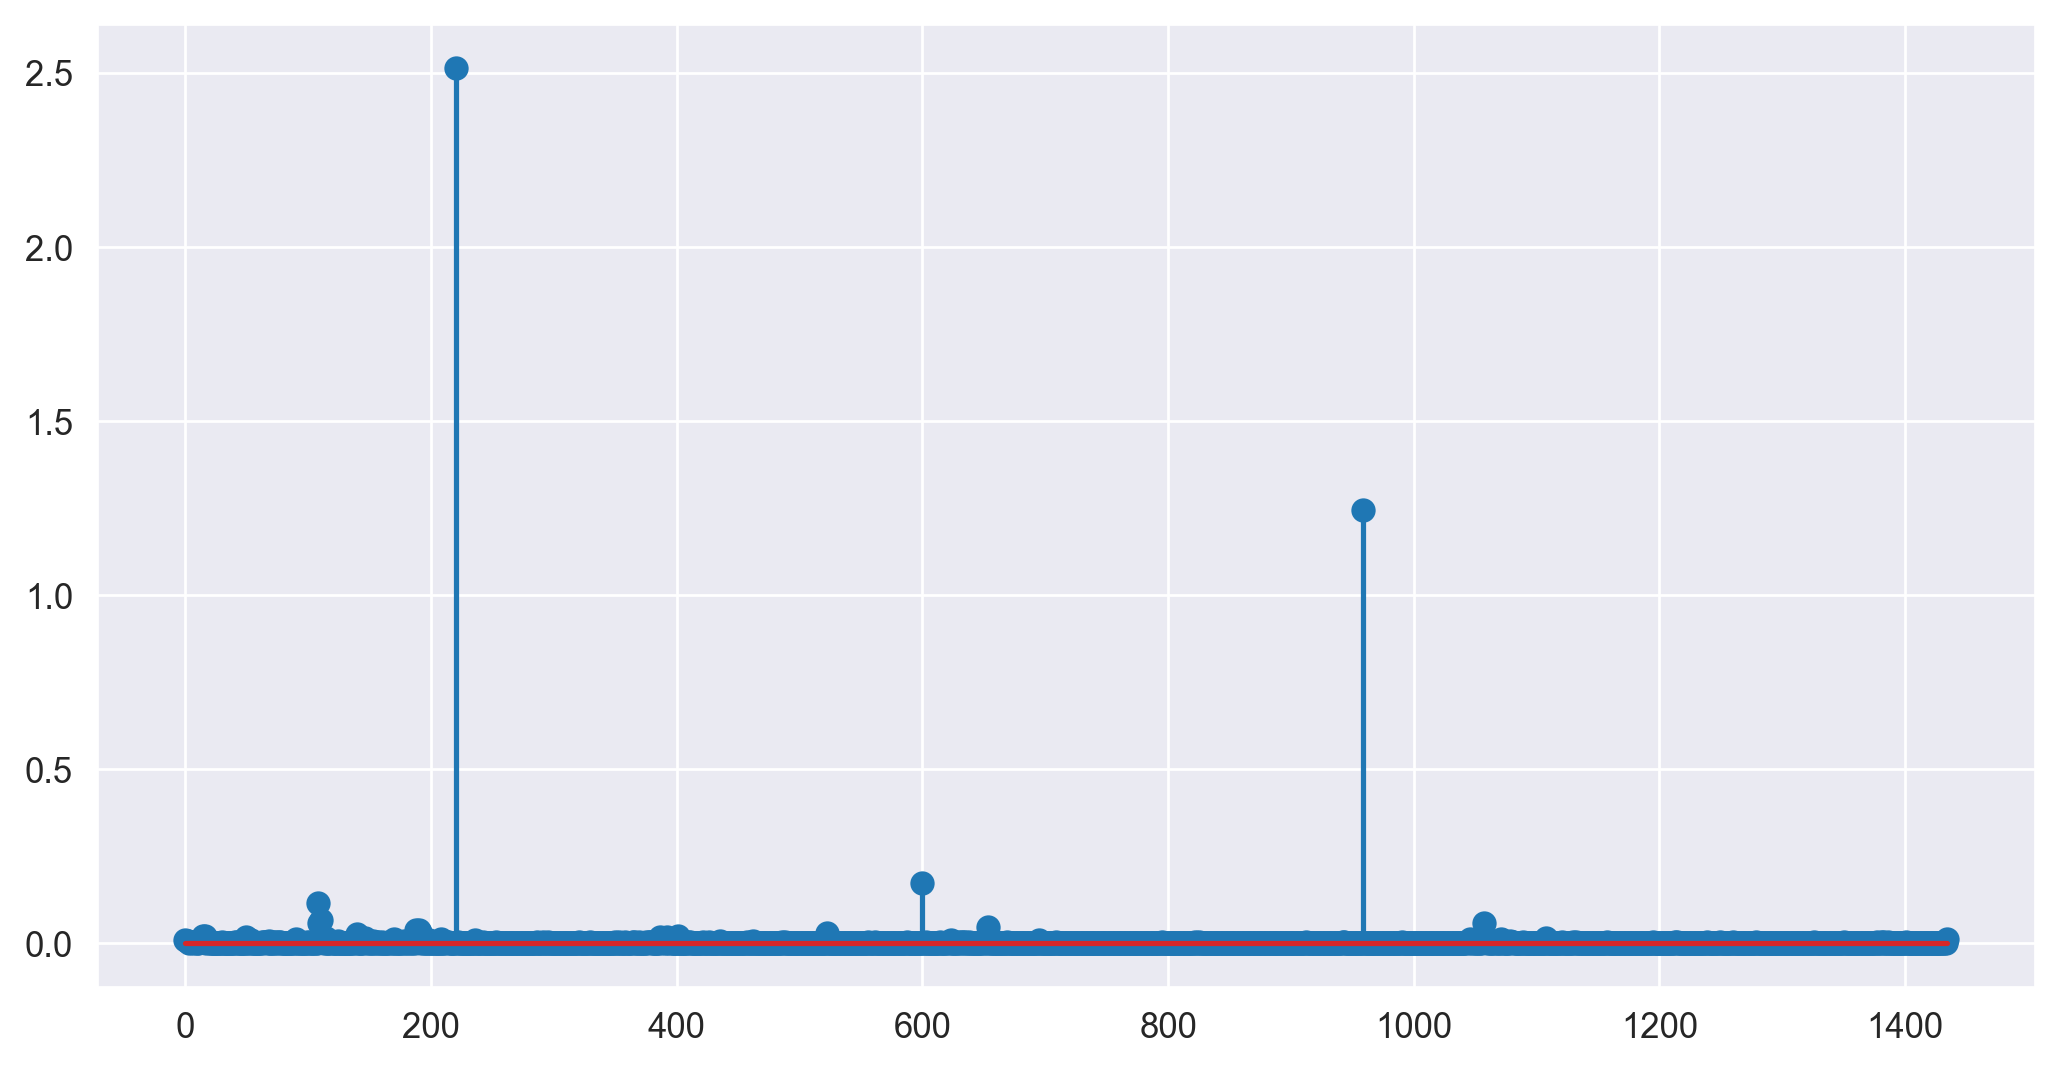

In [49]:
# Cook's distance plot
plt.stem(c1)

In [50]:
np.argmax(c1),np.max(c1)

(220, 2.5136087647624055)

In [51]:
data.iloc[[219]]

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
220  11950         43  74285  110  1600      5      5             85    1075

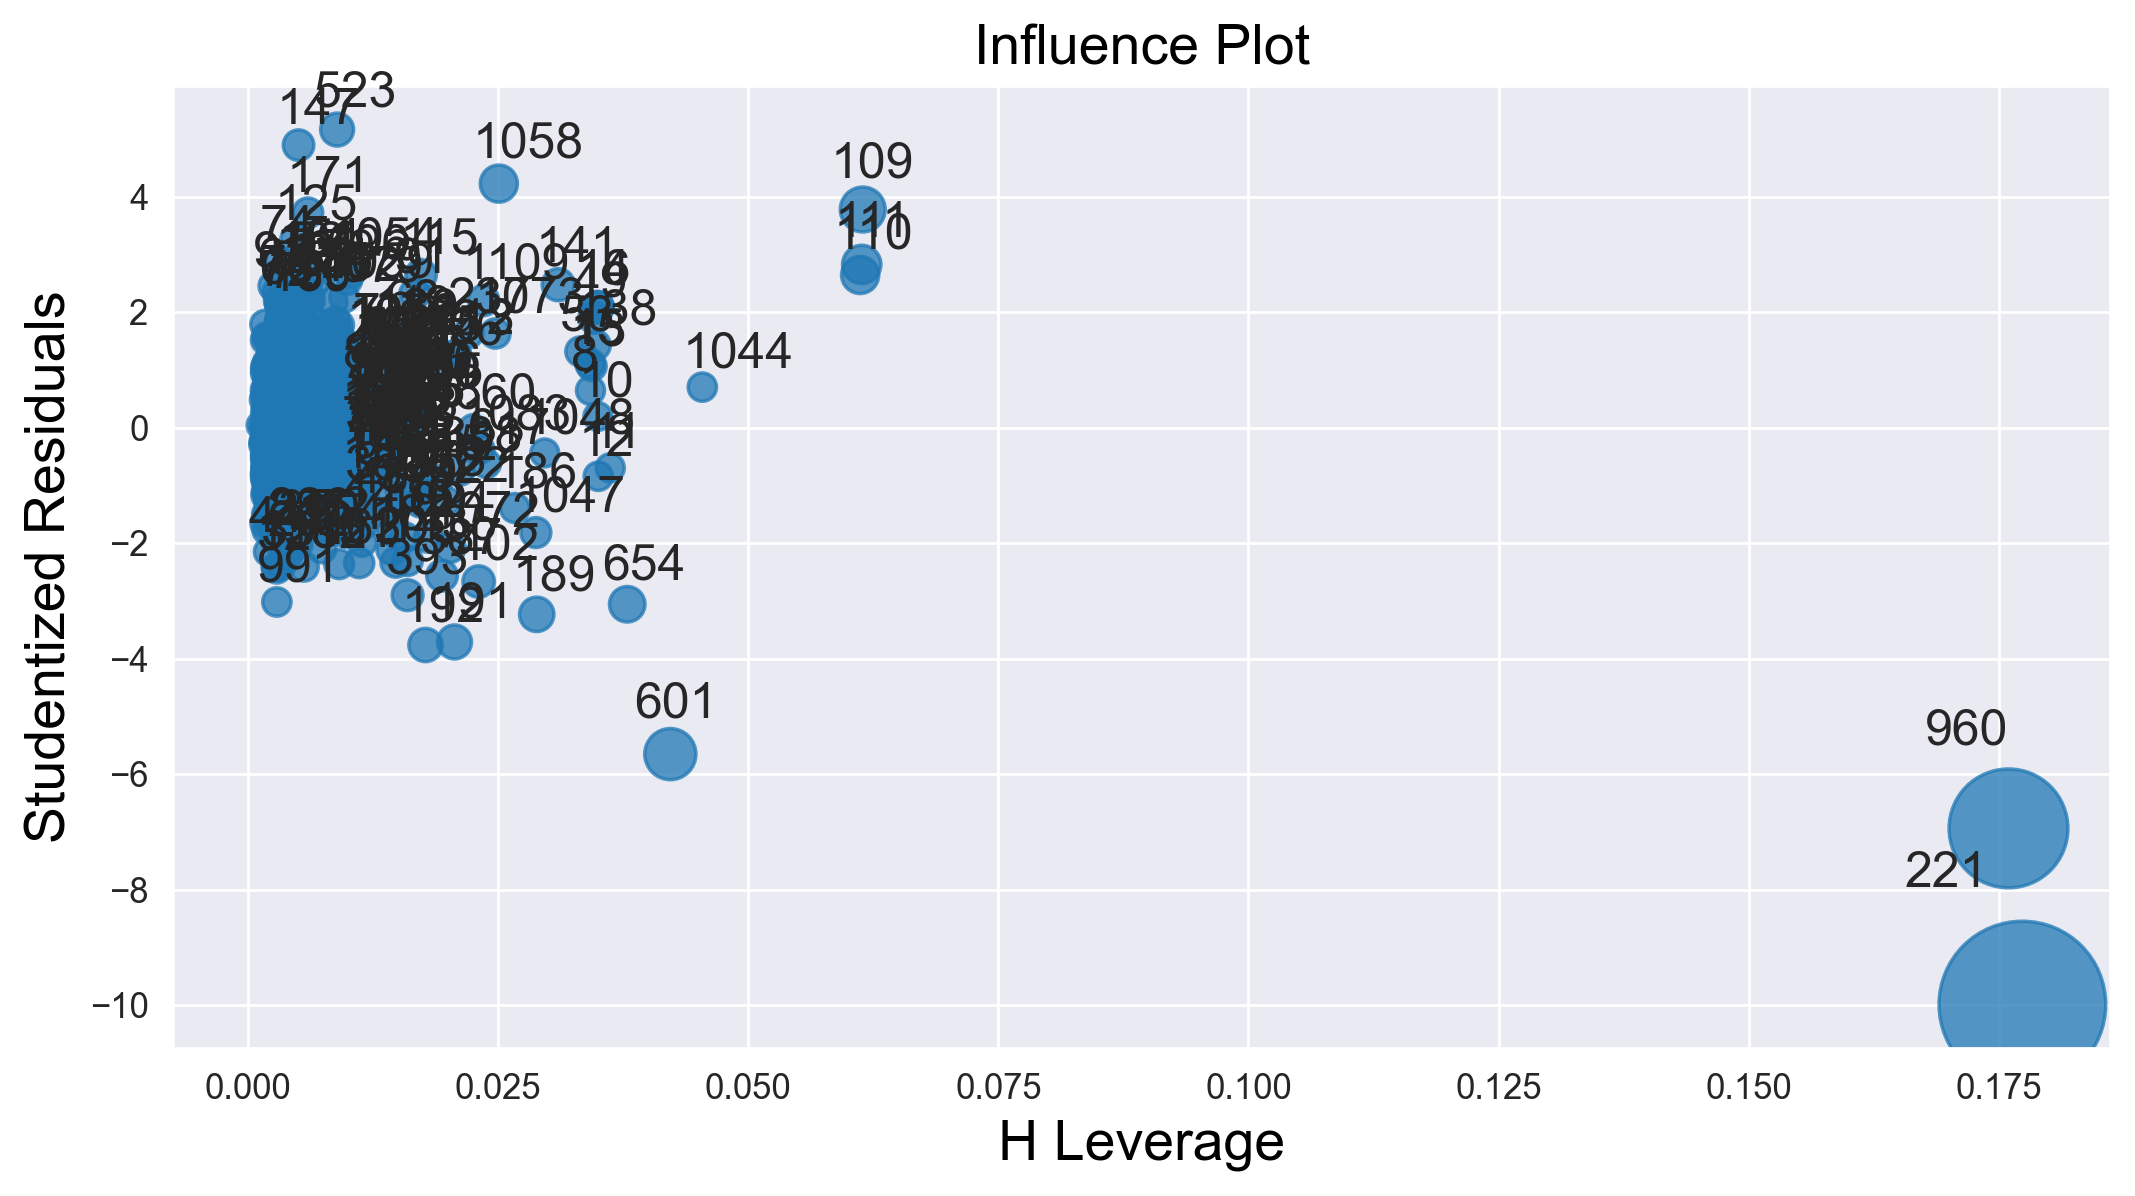

In [52]:
influence_plot(model2);

In [53]:
data.drop(index=221,inplace=True)

In [54]:
data.drop(index=960,inplace=True)

In [55]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Weight+Quarterly_Tax',data=data).fit()
model3.rsquared

0.8846523326104506

In [56]:
#Find the influence data
model3_inf = model3.get_influence()

#Calculate the cooks distance
c2 , p = model3_inf.cooks_distance

In [57]:
c2

array([7.72656704e-03, 4.08549168e-03, 5.51037496e-03, ...,
       1.04142295e-05, 1.21977469e-03, 2.01668979e-02])

<StemContainer object of 3 artists>

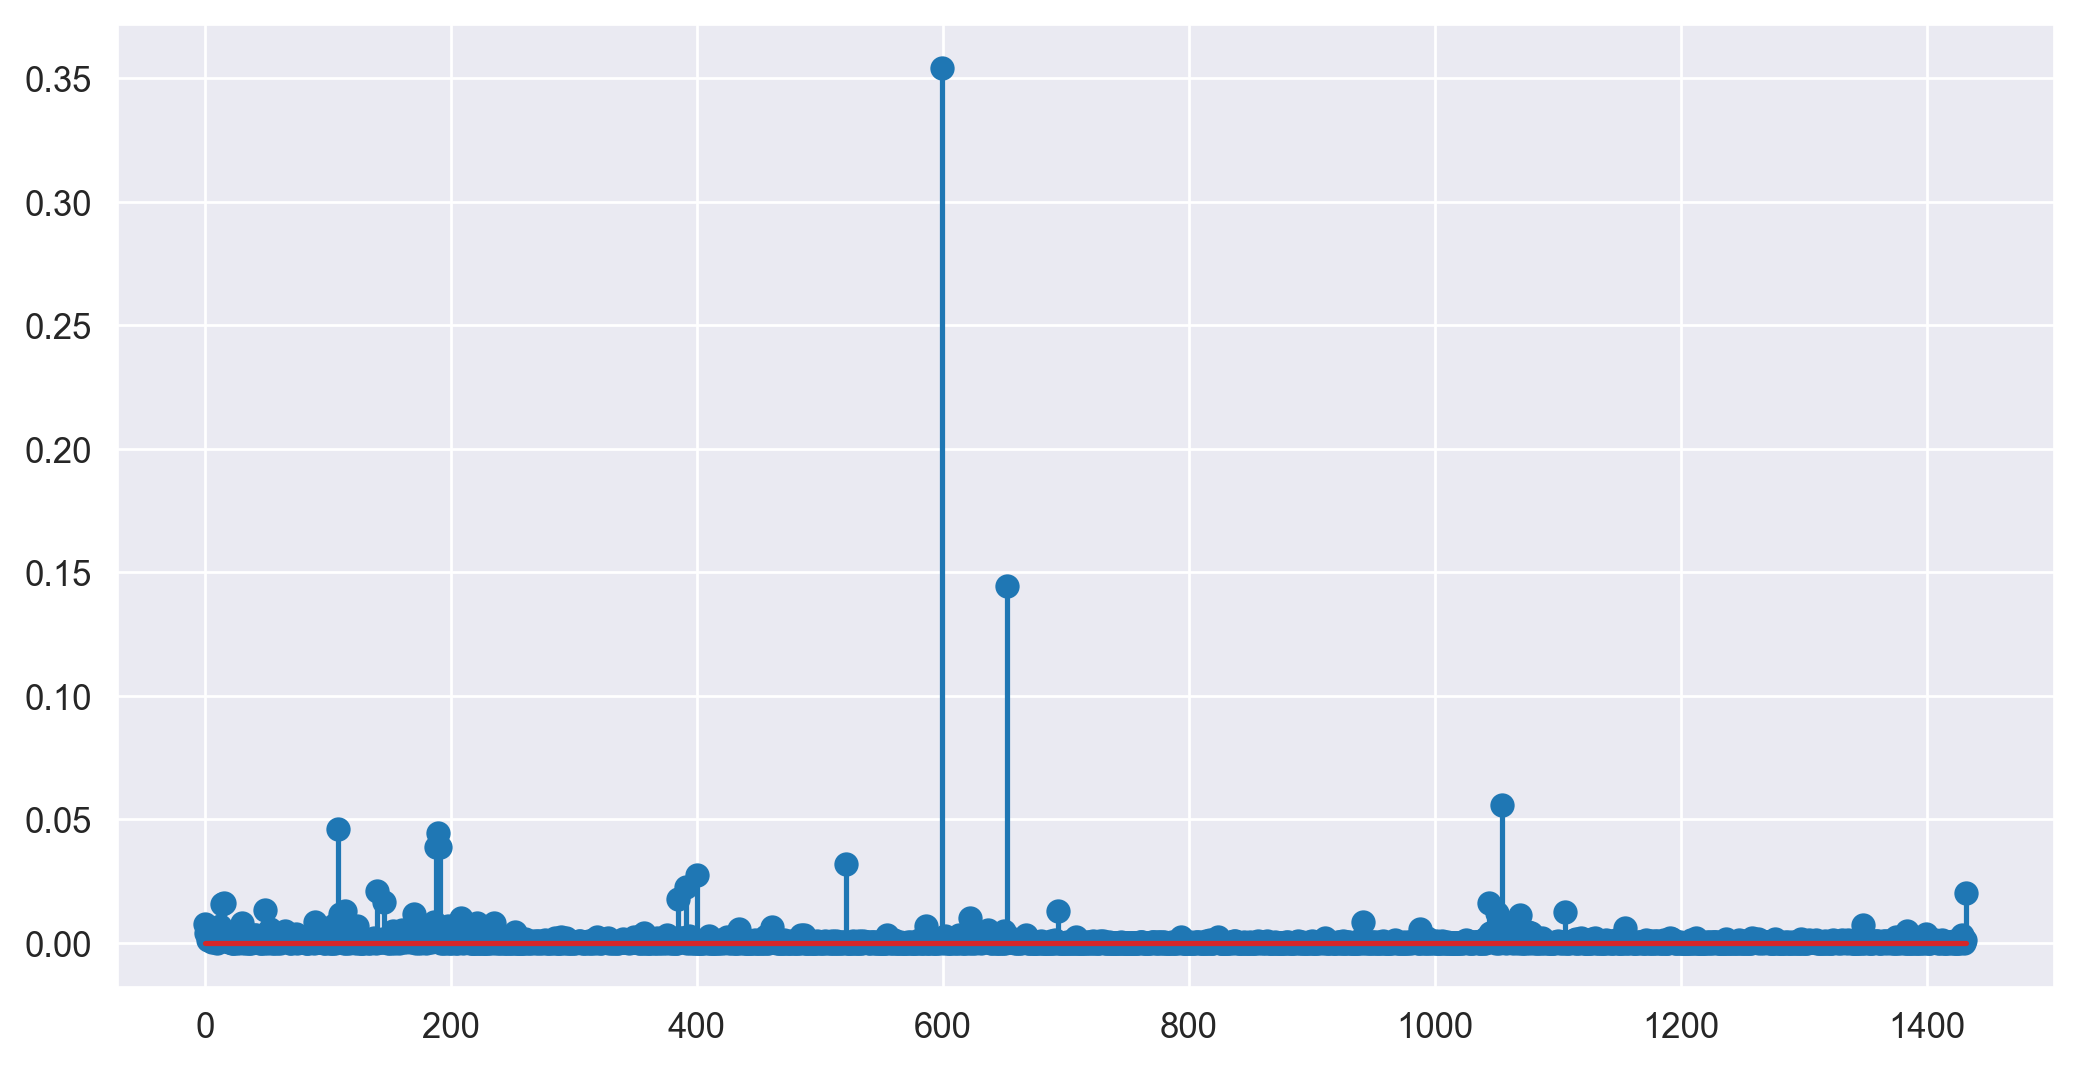

In [58]:
plt.stem(c2)

In [59]:
np.argmax(c2),np.max(c2)

(599, 0.3541423066238539)

In [60]:
# Now as we see that the c value is less than 0.5 we will select model3 whose accuracy increased from 86 to 88.

In [61]:
data.head(962)

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0    13500         23  46986   90  2000      3      5            210    1165
1    13750         23  72937   90  2000      3      5            210    1165
2    13950         24  41711   90  2000      3      5            210    1165
3    14950         26  48000   90  2000      3      5            210    1165
4    13750         30  38500   90  2000      3      5            210    1170
..     ...        ...    ...  ...   ...    ...    ...            ...     ...
959   8895         61  50925  110  1600      5      5             85    1070
961   8750         59  50469  110  1600      5      5             85    1070
962   9750         61  50173  110  1600      5      5             85    1075
963   9950         62  50000  110  1600      5      5             85    1075
964  10950         65  49942  110  1600      3      6             85    1065

[962 rows x 9 columns]

In [62]:
# Price Prediction

In [63]:
data.head()

Price  Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
0  13500         23  46986  90  2000      3      5            210    1165
1  13750         23  72937  90  2000      3      5            210    1165
2  13950         24  41711  90  2000      3      5            210    1165
3  14950         26  48000  90  2000      3      5            210    1165
4  13750         30  38500  90  2000      3      5            210    1170

In [65]:
car_new = pd.DataFrame({"Age_08_04":23,"KM":46986,"HP":90,"cc":2000,"Doors":3,"Gears":5,"Quarterly_Tax":210,"Weight":1165},index=[0])
predicted_price = model3.predict(car_new)
print("The Price will be : ",predicted_price[0])

The Price will be :  16357.059193640398
